In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA1

In [9]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [11]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [13]:
df.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
#histogram visualization to check how data's are distributed

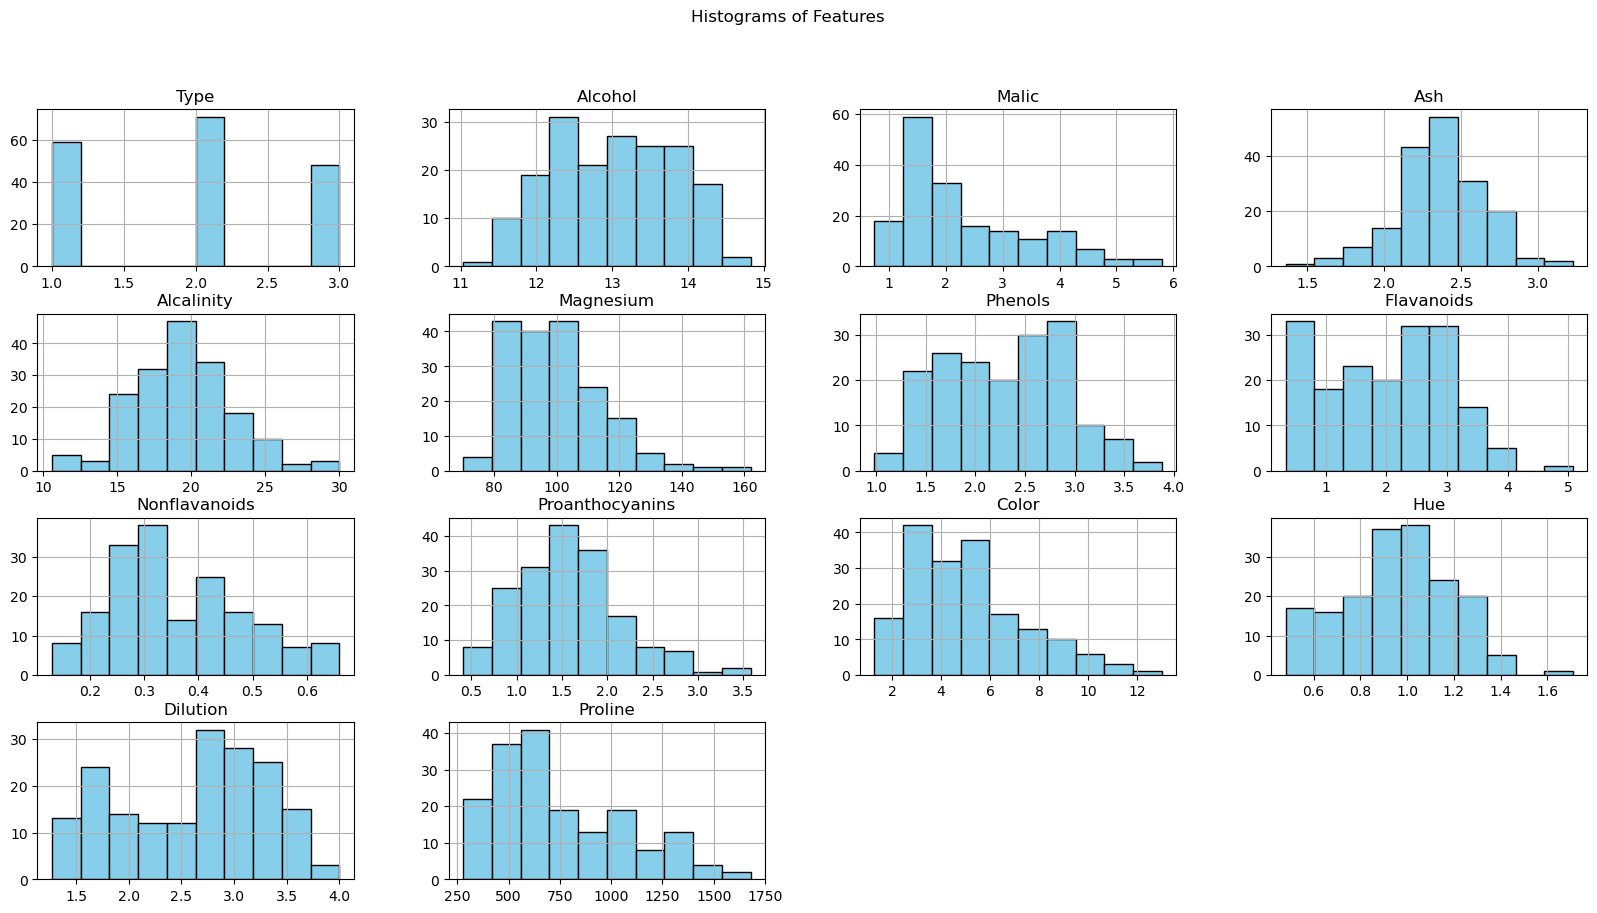

In [15]:
df.hist(bins=10, figsize=(20,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()

In [ ]:
#box plot visualization to check is their any outliers present or not

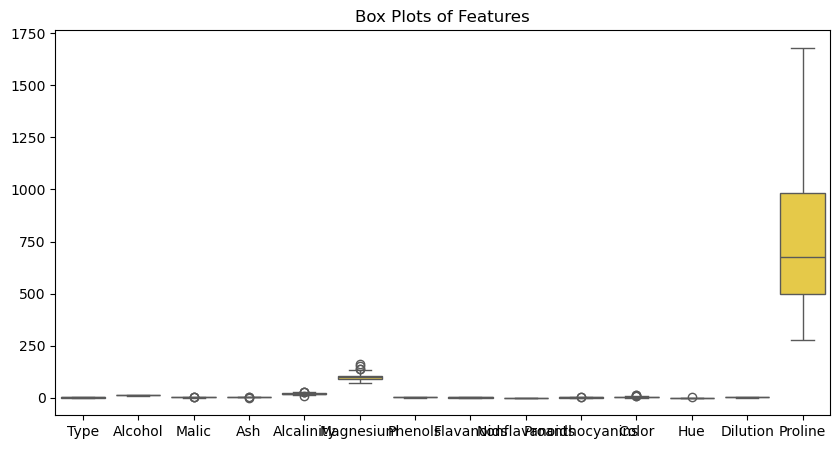

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette="Set2")
plt.title("Box Plots of Features")
plt.show()

In [ ]:
#'Malic', 'Ash', 'Alcalinity', 'Magnesium','Proanthocyanins', 'Color', 'Hue' have some outliers and treating outliers using cap and floor method

In [19]:
import numpy as np

# Defining the quantiles for capping and flooring
lower_quantile = 0.01  # 1st percentile
upper_quantile = 0.99  # 99th percentile

# Listing of columns to cap and floor
columns_to_cap_floor = ['Malic', 'Ash', 'Alcalinity', 'Magnesium','Proanthocyanins', 'Color', 'Hue']

# Appling the cap and floor method to each specified column
for column in columns_to_cap_floor:
    lower_limit = df[column].quantile(lower_quantile)
    upper_limit = df[column].quantile(upper_quantile)
    
    # Appling floor and cap
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

In [ ]:
#box plot visualization after treating outliers

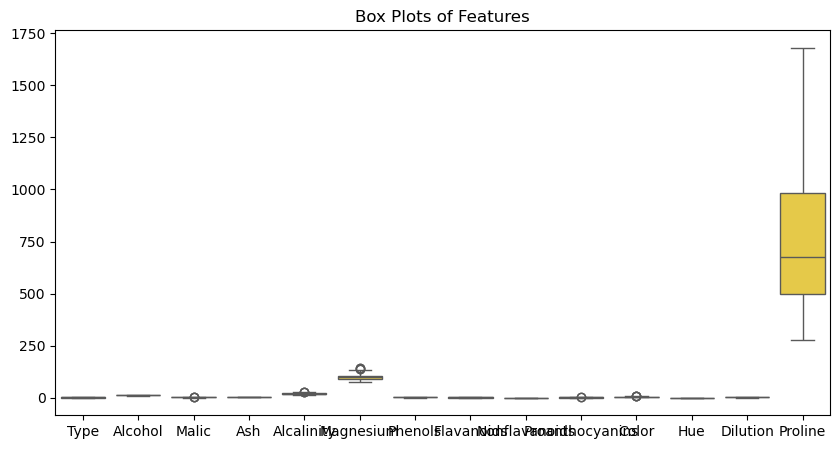

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette="Set2")
plt.title("Box Plots of Features")
plt.show()

In [ ]:
#correelation to check how columns are related to other columns
#-1 value shows weak correlation
#1 value shows strong correaltion

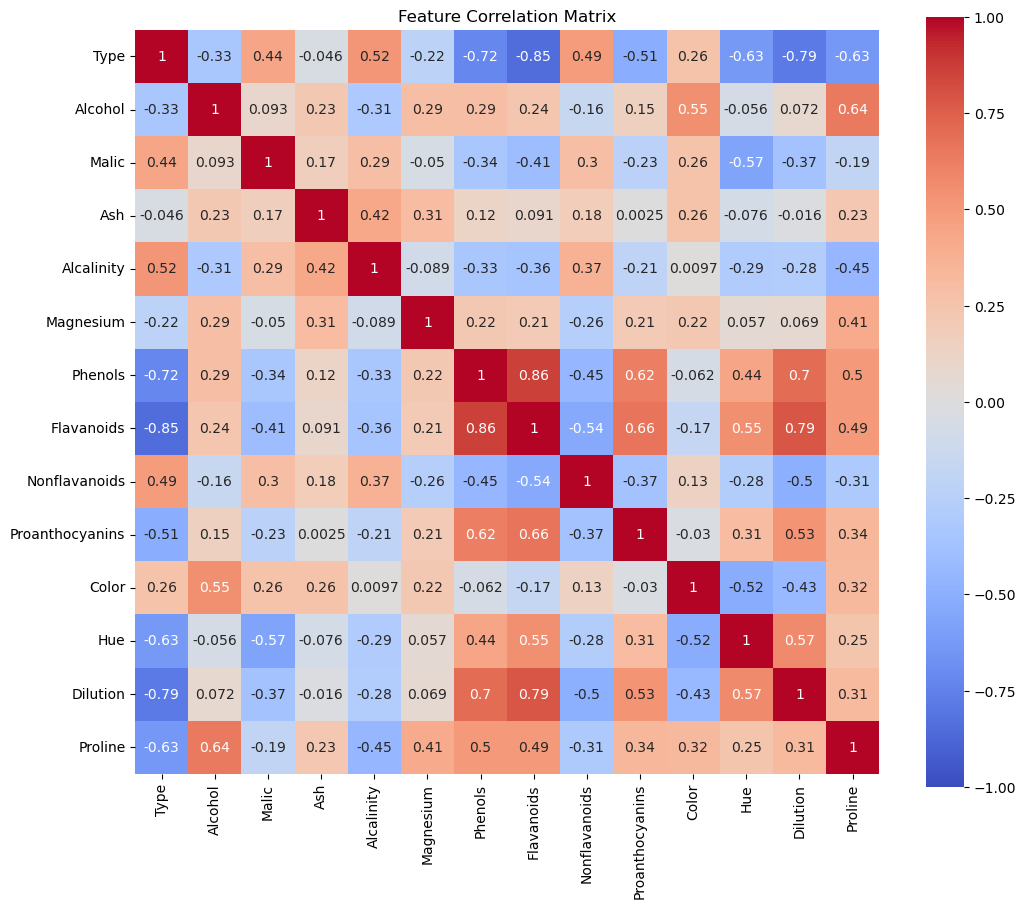

In [23]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
#using  Variance Inflation Factor (VIF) to check if it happens multicollinearity
#If VIF > 10: Strong multicollinearity (consider removing or combining features).
#If 5 < VIF ≤ 10: Moderate multicollinearity (requires attention).
#VIF ≤ 5: Acceptable level of multicollinearity.


In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming your dataset is loaded into a DataFrame called df
# Select only numeric columns for VIF calculation

numeric_columns = ['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']
df_numeric = df[numeric_columns]

# Add a constant for the intercept
df_with_const = add_constant(df_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Type"] = df_numeric.columns
vif_data["VIF"] = [
    variance_inflation_factor(df_with_const.values, i + 1)
    for i in range(len(df_numeric.columns))
]

In [99]:
print(vif_data)

               Type       VIF
0           Alcohol  2.428107
1             Malic  1.658855
2               Ash  2.065067
3        Alcalinity  2.192506
4         Magnesium  1.418276
5           Phenols  4.310118
6        Flavanoids  6.916139
7     Nonflavanoids  1.757587
8   Proanthocyanins  1.961111
9             Color  3.033686
10              Hue  2.619316
11         Dilution  3.789672
12          Proline  2.864625


In [ ]:
#droping 'Type' it is a target variable
#droping 'Flavanoids'it has 6.916139 vif value 
#Im taking below 5 vif values

In [101]:
x=df.drop(['Type','Flavanoids'],axis=1)

In [27]:
from sklearn.decomposition import PCA

In [ ]:
#fitting the Principle component analysis model to features

In [103]:
pca=PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [105]:
x_pca=pca.transform(x)

In [ ]:
#original dataset shape

In [107]:
x.shape

(178, 12)

In [ ]:
#principle component analysis helps to reduce the dimensinality of the data

In [ ]:
#inference for pca
#1)Dimensionality Reduction:
#PCA reduces the number of features by transforming the data into a set of uncorrelated variables (principal components).
#These principal components are linear combinations of the original features, sorted by the amount of variance they capture.
#2)Variance Explained:
#The first few principal components often capture the majority of the variance in the data.
#The "explained variance ratio" helps decide how many components are sufficient to represent the data.
#Feature Relationships:
#PCA identifies correlations among features. Highly correlated features are combined into single components, reducing redundancy.
#Data Simplification:
#By projecting the data into fewer dimensions, PCA makes the dataset manageable and helps reduce computational cost in machine learning tasks.
#Improved Model Performance:
#PCA can reduce noise and multicollinearity in the data, improving the performance of clustering, regression, and classification algorithms.


In [109]:
x_pca.shape

(178, 2)

In [111]:
pca_df = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
if 'Type' in df.columns:
    pca_df['Type'] = df['Type'] 

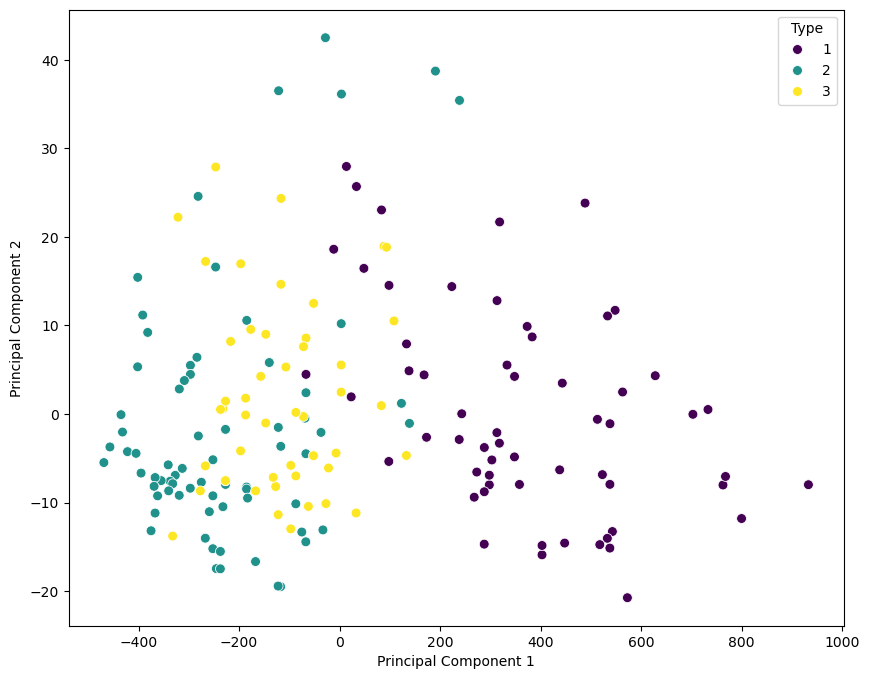

Explained Variance by Principal Components: [0.99828736 0.0015532 ]


In [115]:
plt.figure(figsize=(10, 8))
if 'Type' in df.columns:
    sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Type', data=pca_df, palette="viridis", s=50)
else:
    plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', s=50)
    plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Type" if 'Type' in df.columns else "")
plt.show()

# Step 6: Check the explained variance ratio
print("Explained Variance by Principal Components:", pca.explained_variance_ratio_)

# PCA Visualization:

In [ ]:
#1)Clusters in PCA-Reduced Dimensions:
#The plot shows data points reduced to two principal components (Principal Component 1 and Principal Component 2).
#The 'type' target variable having 3 types color-coded into three clusters or groups (Type 1, Type 2, and Type 3), indicating successful segregation of the data into distinct groups.
#2)Cluster Separation:
#Type 1 (purple) is fairly well-separated from the other two clusters, suggesting distinct characteristics for this group.
#Type 2 (teal) and Type 3 (yellow) show some overlap, indicating that these two groups may share similar features or may need further refinement for clearer distinction.

In [ ]:
#3)PCA Effectiveness:
#PCA has helped visualize the relationships among the data points, revealing patterns that may not have been apparent in higher dimensions.
#4)Interpretation of Variance:
#The axes represent the two most significant principal components, which capture the majority of the variance in the data.

# Actionable Next Steps

In [176]:
#this visualization is part of clustering,
#consider improving clustering by exploring different algorithms (e.g., DBSCAN, K-means) or parameter tuning.

# DB scan

In [150]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [152]:
# Standardize the data (DBSCAN is sensitive to feature scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [164]:
# Performing PCA 
pca = PCA(n_components=2)
x_pca1= pca.fit_transform(data_scaled)

In [166]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed
dbscan_labels = dbscan.fit_predict(x_pca1)

In [170]:
pca_df1 = pd.DataFrame(data=x_pca1, columns=['Principal Component 1_', 'Principal Component 2_'])
if 'Type' in df.columns:
    pca_df1['Type'] = df['Type'] 

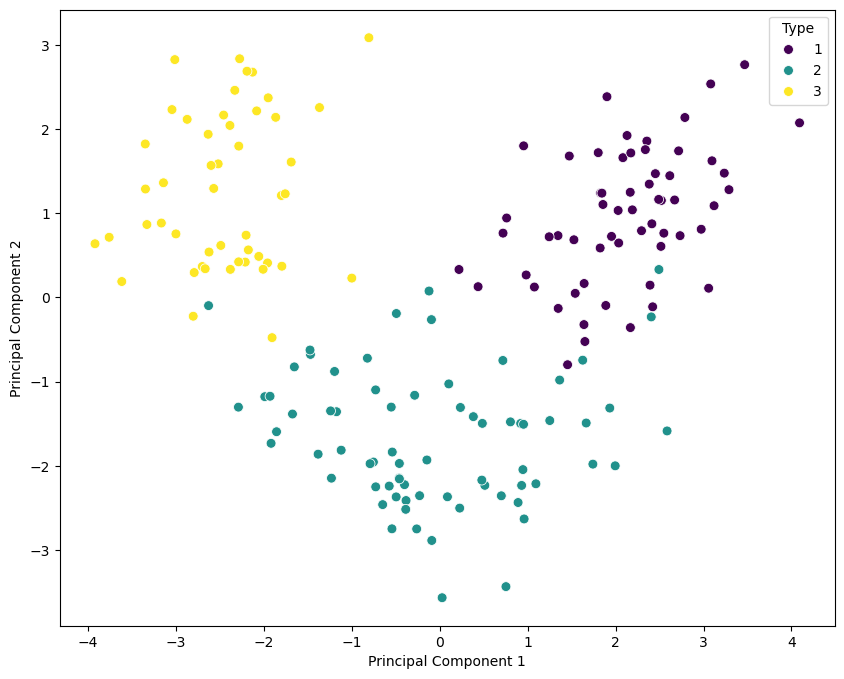

Explained Variance by Principal Components: [0.3289228 0.2105913]


In [172]:
plt.figure(figsize=(10, 8))
if 'Type' in df.columns:
    sns.scatterplot(x='Principal Component 1_', y='Principal Component 2_', hue='Type', data=pca_df1, palette="viridis", s=50)
else:
    plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', s=50)
    plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Type" if 'Type' in df.columns else "")
plt.show()

# Step 6: Check the explained variance ratio
print("Explained Variance by Principal Components:", pca.explained_variance_ratio_)

In [ ]:
#1)Cluster Formation:
#The DBSCAN algorithm has successfully identified three distinct clusters, as shown by the color-coded points corresponding to Type 1 (purple), Type 2 (teal), and Type 3 (yellow).
#These clusters appear reasonably well-separated in the PCA-reduced dimensions.
#2)Density-Based Segmentation:
#DBSCAN groups data points based on density. The clear separation between clusters indicates that the density threshold (eps) was well-chosen for this dataset.
#The algorithm has also likely labeled outliers or noise (if any), though they are not apparent in this plot.
#3)Cluster Structure:
#Type 1 (purple) and Type 3 (yellow) clusters are compact and relatively well-defined.
#Type 2 (teal) is more spread out, indicating a lower density within the cluster. This could suggest greater variance in the features of this group.

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

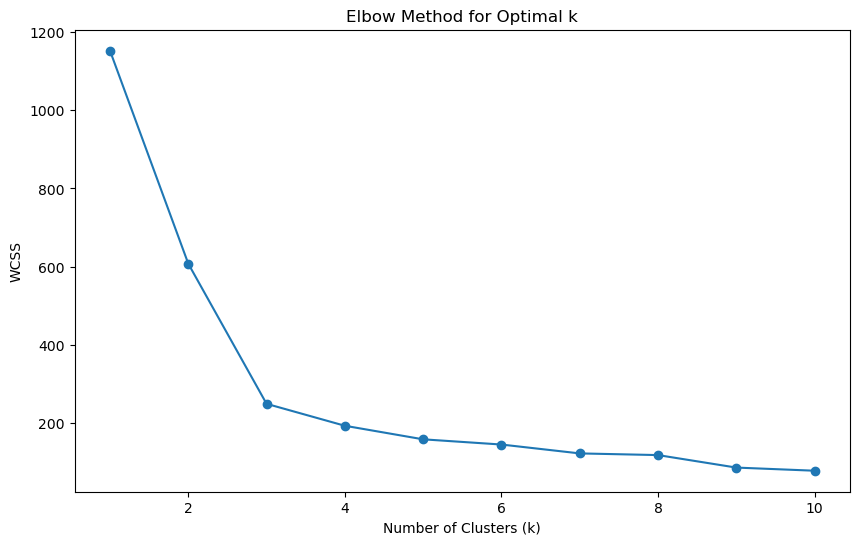

In [183]:
from sklearn.cluster import KMeans
# Calculate WCSS for different values of k (1 to 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_pca1)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the "elbow" point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [139]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data1 = pca.fit_transform(x)

In [141]:
# Apply K-Means to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=42)  # Use the same n_clusters as before
kmeans_pca.fit(pca_data1)
labels_pca1 = kmeans_pca.labels_

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [203]:
silhouette_pca = silhouette_score(pca_data1, labels_pca1)
print(f"Silhouette Score for PCA-Transformed Data: {silhouette_pca}")

Silhouette Score for PCA-Transformed Data: 0.6574489423393224


In [205]:
# Calculate the Davies-Bouldin Score
db_score = davies_bouldin_score(pca_data1, labels_pca1)
print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 0.4781426387991492


In [ ]:
#A Silhouette Score of 65% (or 0.65 on a scale of -1 to 1) for your K-Means clustering algorithm is a good result! Typically,
#a Silhouette Score closer to +1 indicates well-separated and well-formed clusters, while a score closer to 0 suggests overlapping clusters or poor clustering.
#Negative values imply that the samples are likely misclassified.